Last time we saw how to do Data preprocessiong on titanic dataset which many professional data scientist would say is the first step towards doing a data science project. If you didn’t you have to ,

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [61]:
df = pd.read_csv("/content/house.csv")

In [62]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [63]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [64]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [65]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [66]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [67]:
categorical_data = df.select_dtypes(include = "object")
categorical_data.head()

,date
0,20141013T000000
1,20141209T000000
2,20150225T000000
3,20141209T000000
4,20150218T000000


In [68]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**- What can we infer from the above describe function ?**
- Look at the bedroom columns , the dataset has a house where the house has 33 bedrooms , seems to be a massive house and would be interesting to know more about it as we progress.
Maximum square feet is 13,450 where as the minimum is 290. we can see that the data is distributed.
- Similarly , we can infer so many things by just looking at the describe function.
- Now , we are going to see some visualization and also going to see how and what can we infer from visualization.
- Which is the most common house (Bedroom wise) ?
* Let’s see which is most common bedroom number. You may wonder why is it important ? Let’s look at this problem from a builder’s perspective, sometimes it’s important for a builder to see which is the highest selling house type which enables the builder to make house based on that. Here in India , for a good locality a builder opts to make houses which are more than 3 bedrooms which attracts the higher middle class and upper class section of the society.
Let’s see how this pans out for this data ?

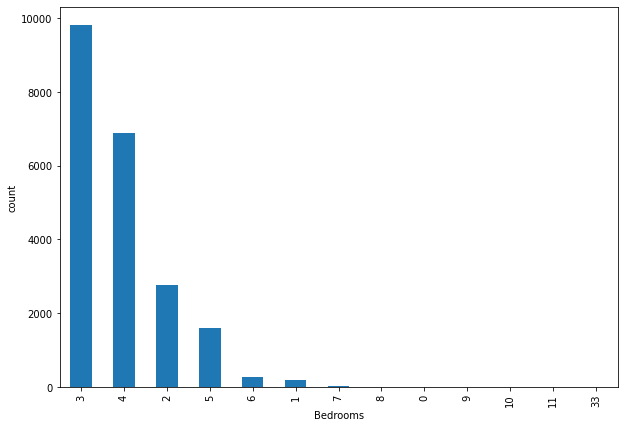

In [69]:
plt.figure(figsize = (10,7))
df.bedrooms.value_counts().plot(kind="bar");
plt.xlabel("Bedrooms")
plt.ylabel("count")
plt.show()

As we can see from the visualization 3 bedroom houses are most commonly sold followed by 4 bedroom. So how is it useful ? For a builder having this data , He can make a new building with more 3 and 4 bedroom’s to attract more buyers.
So now we know that 3 and 4 bedroom’s are highest selling. But at which locality ?

**Visualizing the location of the houses based on latitude and longitude.**
- So according to the dataset , we have latitude and longitude on the dataset for each house. We are going to see the common location and how the houses are placed.
- **Note**: You have the choice for choosing the graph you want here is a jointplot, you can illustrate them by any other graph 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

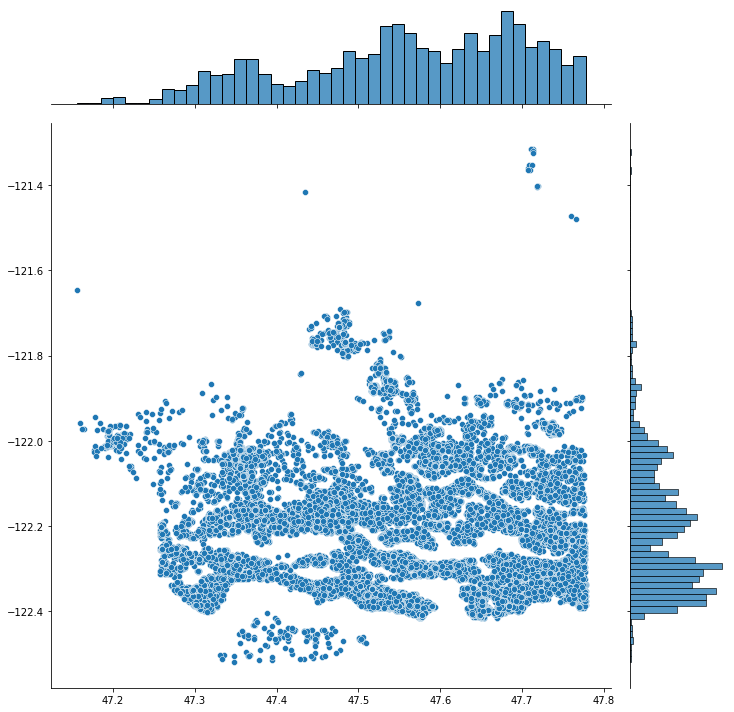

In [70]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10);
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine;

* We use seaborn , and we get his beautiful visualization. Joinplot function helps us see the concentration of data and placement of data and can be really useful. Let us see what we can infer from this visualization. For latitude between -47.7 and -48.8 there are many houses , which would mean that maybe it’s an ideal location isn’t it ? But when we talk about longitude we can see that concentration is high between -122.2 to -122.4. Which would mean that most of the buy’s has been for this particular location.

**How common factors are affecting the price of the houses ?**

* We saw the common locations and now we’re going to see few common factors affecting the prices of the house and if so ? then by how much ?
Let us start with , If price is getting affecting by living area of the house or not ?

Text(0.5, 1.0, 'Price vs Square Feet')

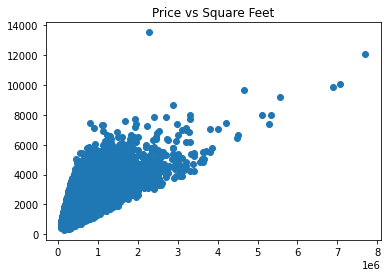

In [71]:
plt.scatter(df.price,df.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Longitude')

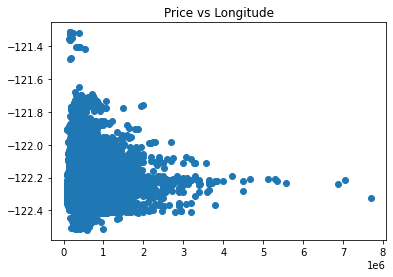

In [72]:
plt.scatter(df.price,df.long)
plt.title("Price vs Longitude")

We can see more factors affecting the price

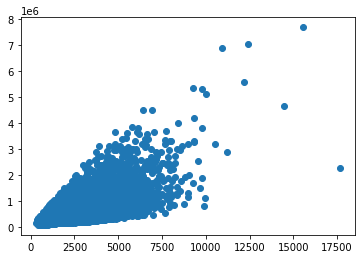

In [73]:
plt.scatter((df['sqft_living']+df['sqft_basement']),df['price'])

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

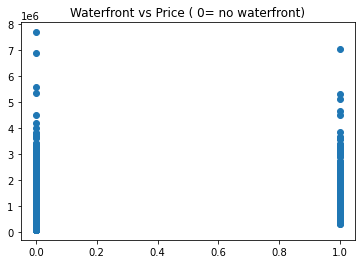

In [74]:

plt.scatter(df.waterfront,df.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

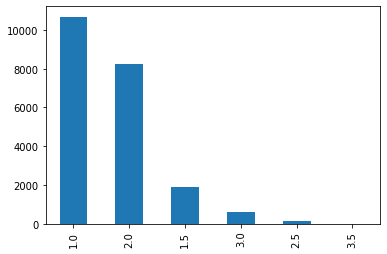

In [75]:

df.floors.value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

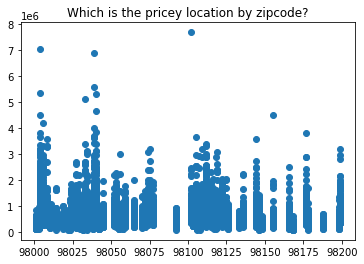

In [76]:
plt.scatter(df.zipcode,df.price)
plt.title("Which is the pricey location by zipcode?")

# **Feature Selection**:
One of the most important part in Data Preprocessing is the part of feature selection 
- Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.
Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

**How to select features and what are Benefits of performing feature selection before modeling your data?**

· Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

· Improves Accuracy: Less misleading data means modeling accuracy improves.

· Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

## Feature Selection Methods:
I will share 3 Feature selection techniques that are easy to use and also gives good results.
1. Univariate Selection
2. Feature Importance
3.Correlation Matrix with Heatmap
Let’s have a look at these techniques one by one with an example

### 1. Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the **SelectKBest** class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
"""First let's drop categorical data just for trying ro choose which is the best without detailed data preprocessing, generally we have to convert all categorical to numerical 
But the aim behind thid part is to explain how to generate a model selection """
# Drop date and id 
df.drop("date",  axis='columns', inplace=True)
X = df.iloc[:,0:19]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: ignored

As we can see above when we run the cell we get error because of negative values 

The error message `Input X must be non-negative` says it all: Pearson's chi square test (goodness of fit) does not apply to negative values. It's logical because the chi square test assumes frequencies distribution and a frequency can't be a negative number. Consequently, sklearn.feature_selection.chi2 asserts the input is non-negative.

You are saying that your features are "min, max, mean, median and FFT of accelerometer signal". In many cases, it may be quite safe to simply shift each feature to make it all positive, or even normalize to [0, 1] interval as suggested by EdChum.

If data transformation is for some reason not possible (e.g. a negative value is an important factor), you should pick another statistic to score your features:

`sklearn.feature_selection.f_classif` computes ANOVA `f-value`
`sklearn.feature_selection.mutual_info_classif` computes the mutual information
Since the whole point of this procedure is to prepare the features for another method, it's not a big deal to pick anyone, the end result usually the same or very close.

Here where comes the concept of **Normalization** and the need of it

To normalize the Data or the column that has the negative values we have to use the function `**MinMaxScaler()**`

- The column long contains of negative values 

In [79]:
df["long"].head()

0   -122.257
1   -122.319
2   -122.233
3   -122.393
4   -122.045
Name: long, dtype: float64

In [85]:
# Let's normalize the column of "long"
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

df['long'] = mms.fit_transform(df[['long']])
# let's see the result 
df["long"].head()

0    0.217608
1    0.166113
2    0.237542
3    0.104651
4    0.393688
Name: long, dtype: float64

In [87]:
X = df.iloc[:,2:19]  #independent columns
y = df.iloc[:,2]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs         Score
3        sqft_lot  3.924820e+06
2     sqft_living  3.181871e+06
9      sqft_above  2.164897e+06
10  sqft_basement  1.527037e+06
16  sqft_living15  9.697980e+05
12   yr_renovated  1.119418e+05
0        bedrooms  5.546005e+03
1       bathrooms  1.736947e+03
8           grade  6.094955e+02
11       yr_built  5.613726e+02


To read about Chi_squared : check out the link below :
https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223#:~:text=A%20chi%2Dsquare%20test%20is,count%20O%20deviates%20each%20other.

### 2. Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.65887875 0.03510118 0.05984396 0.01398968 0.01963745 0.0011825
 0.00538774 0.00784068 0.01914913 0.04671144 0.02439848 0.02832308
 0.00325802 0.01798992 0.01517437 0.0161377  0.02699592]


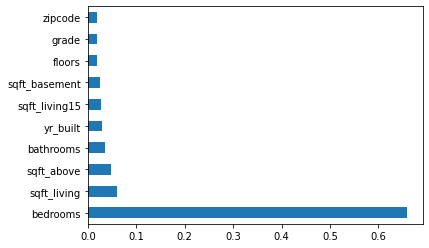

In [88]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 3.Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

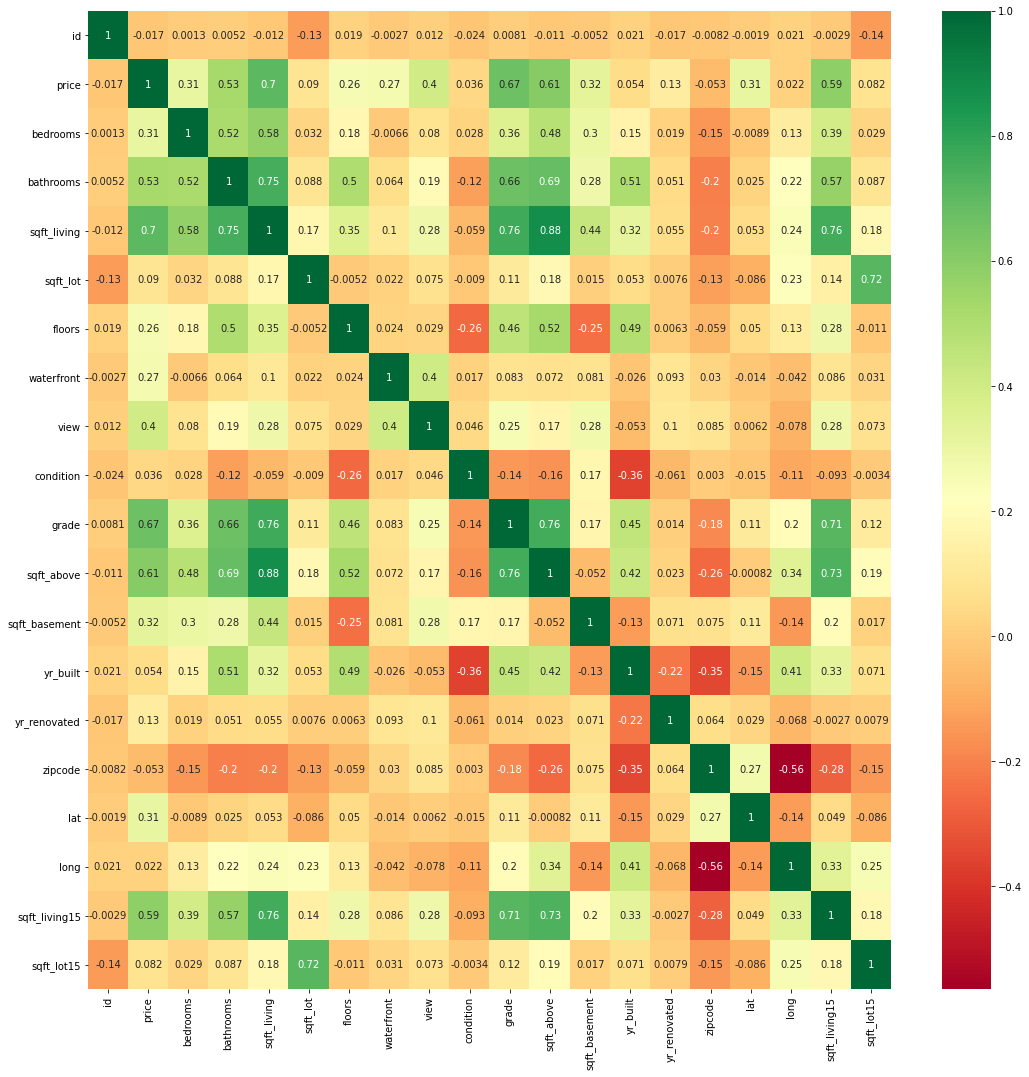

In [90]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,18))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

- Have a look at the last row i.e price range, see how the price range is correlated with other features

- In this article we have discovered how to select relevant features from data using Univariate Selection technique, feature importance and correlation matrix.
-But as I am always saying **"It depends on your predictions, and the results needed "**

# Split the Dataset into Train and Test

We use train data and test data , train data to train our machine and test data to see if it has learnt the data well or not. Before anything , I want everyone to remember that the machine is the student and train data is the syllabus and test data is the exam. we see how much the machine has scored and if it scores well are model is successful.

-So what did we do ? Let’s go step by step.

- We import our dependencies , for linear regression we use sklearn (built in python library) and import linear regression from it.

- We then initialize Linear Regression to a variable reg.
-Now we know that prices are to be predicted , hence we set labels (output) as price columns 

- We again import another dependency to split our data into train and test.
I’ve made my train data as 90% and 10% of the data to be my test data , and randomized the splitting of data by using random_state.

- I’ve made my train data as 90% and 10% of the data to be my test data , and randomized the splitting of data by using random_state.

- So now , we have train data , test data and labels for both let us fit our train and test data into linear regression model.
- After fitting our data to the model we can check the score of our data ie , prediction. in this case the prediction is 73%

- The accuracy of the model is lower than our aim of 85. So how do we achieve that 85% target ?

- We use a different method , which is very important for weak prediction models such as this.

- This might seem to be a bit advanced but if understood is a really brilliant tool to enable better predictions.

#### OHHH, I sepak too much ^^, So Follow, me follow me 

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

labels = df['price']
train1 = df.drop(['id', 'price'],axis=1)

x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [95]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12826,4,2.50,3910,22710,1.5,0,0,3,8,3910,0,1908,2003,98004,47.6295,0.250831,2920,16544
6410,3,1.75,1660,37642,1.0,0,0,4,7,1660,0,1991,0,98022,47.2559,0.425249,2070,54450
15417,3,1.50,1190,20672,1.5,0,3,3,7,1190,0,1948,0,98166,47.4459,0.132890,2150,16239
16882,3,2.25,2430,73151,1.0,0,0,3,8,2430,0,1974,0,98059,47.4749,0.354651,2800,39250
8467,3,1.00,1490,8995,1.0,0,0,4,7,1490,0,1954,0,98168,47.4901,0.179402,1490,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,2,1.00,720,4222,1.0,0,0,4,5,720,0,1942,0,98056,47.4965,0.276578,860,4785
18898,4,2.50,1820,9161,1.0,0,0,4,7,1220,600,1975,0,98058,47.4333,0.291528,1860,7650
11798,4,3.25,3440,7661,2.0,0,0,3,11,3440,0,2006,0,98029,47.5429,0.435216,3580,6478
6637,2,1.50,870,747,2.0,0,0,3,8,800,70,2004,0,98103,47.6967,0.147010,1710,1280


In [94]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
reg.score(x_test,y_test)

0.7320342760357599

To read More about score : 
https://www.kaggle.com/getting-started/27261

To visualize a linearRegression model we have to have only one feature on x_axes
- We can add a second one but to visualize it we have to use 3D plots to see some details 
- Let's choose only one column 

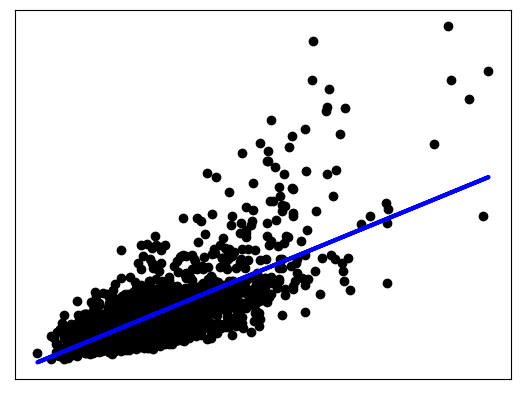

In [111]:
# Seppose we have labels = df['price'], train1 = df.['sqft_living']


labels = df['price']
train2 = df[['sqft_living']]
X_train , X_test , Y_train , Y_test = train_test_split(train2 , labels , test_size = 0.10,random_state =2)
reg = LinearRegression()
# Train the model using the training sets

reg.fit(X_train, Y_train)

# Make predictions using the testing set
df_y_pred = reg.predict(X_test)

# Scatter plot visualization 
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, df_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### Let's plot a 3D plot with three features 

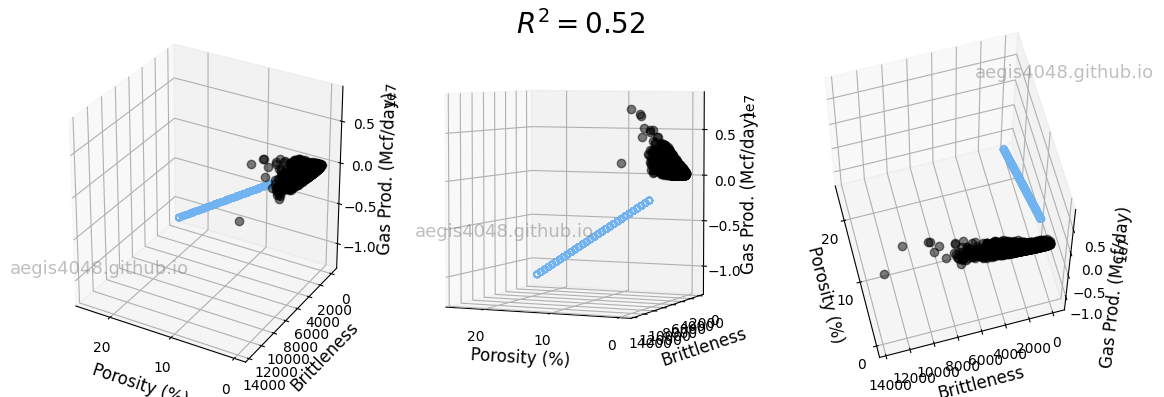

In [112]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

X = df[['long', 'sqft_living']].values.reshape(-1,2)
Y = df['price']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('Brittleness', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

# Weird !!!!!!!!!
### - Read More :

https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

# Polynomial Regression 
- Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x).
- For degree=2, the linear modelis built. The mean squared error is calculated and r squared is found for training and testing.

- For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are `[1, a, b, a^2, ab, b^2]`.

In [120]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics


train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)


features1=['bedrooms','grade','sqft_living','sqft_above']
# With degree = 2 
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_3
Mean Squared Error (MSE)  221965.07
R-squared (training)  0.614
R-squared (testing)  0.616
